<a href="https://colab.research.google.com/github/ProsperOmeh/Data_science_Nigeria/blob/master/DL_TRACK_MINI_KAGGLE_CHALLENGE_by_Omeh_Chukwuemek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA SCIENCE NIGERIA DEEP LEARNING TRACK.
Notebook by Omeh Chukwuemeka

AIM: This was day 20 challenge where we were tasked to build a simple DL model that will classify an input image as either cats or dogs.

TASK PROBLEM STATEMENT AS STATED BY OUR TUTOR. 

Hello before we get to dive deep into advanced models for computer vision, watch the first 3 mins of the video and implement this. Build a convolutional Neural Network (CNN) on the cat and dog dataset gotten from kaggle here:

 Link: https://www.kaggle.com/tongpython/cat-and-dog 
Note: Find out how to load a kaggle dataset from kaggle to google colab without downloading using Kaggle API token in your account. 

Use the following information in building your network on colab:

A. First convolutional layer (16 filters, kernel size is 5 by 5, activation function is relu, input shape = 28 * 28)
B. First Max pooling layer ((2 by 2)
C. Second Convolutonal layer (8 filters, kernel size is 3 by 3, activation function is relu)
D. Second max pooling layer (2 by 2)
E. Flatten the layer
F. 1st hidden layer with 500 neurons using relu (Fully connected)
G. 2nd hidden layer with 300 neuron using relu (fully connected)
H. Output layer with 10 neurons using softmax.
I. Compare the performance when your optimizer is 'rmsprop' from when you used 'adam'.
J. Using accuracy as your evaluation metric, use 'Categorical cross entropy' as your loss metric.

Visualize your training/ testing loss from your training and testing accuracy.

Before i started, i had to download the dataset from kaggle cat-and-dog open challenge. Also, it is worthy of note i got some insights going through several kaggle kernel submission. To download the kaggle dataset to colab, i had to surf the internet for solutions. Luckily i found one from Analytic Vidya medium channel. Link is here https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a
Is the whole processes that was performed till i got the dataset set up in my google drive. Follow the above link and check it out.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

#!kaggle datasets download -d tongpython/cat-and-dog
!ls

/content/gdrive/My Drive/Kaggle
cat-and-dog.zip		       kaggle.json	 test_set
clf_weight_for_RMSprop.pickle  model.h5		 training_set
clf_weight.pickle	       model_RMSprop.h5


In [ ]:
!pwd

/content/gdrive/My Drive/Kaggle


In [ ]:
import cv2                                         # working with, mainly resizing, images
import numpy as np                                 # dealing with arrays
from keras.utils import np_utils
import os                                          # dealing with directories
from random import shuffle                         # mixing up or currently ordered data that might lead our network astray in training.
from keras.models import Sequential                # creating sequential model of CNN
from keras.layers import Convolution2D             # creating convolution layer
from keras.layers import MaxPooling2D              # creating maxpool layer
from keras.layers import Flatten                   # creating input vector for dense layer
from keras.layers import Dense                    # create dense layer or fully connected layer
from keras.layers import Dropout                   # use to avoid overfitting by droping some parameters
from keras.preprocessing import image              # generate image
import matplotlib.pyplot as plt                    # use for visualization
import warnings#

# Importing the Keras libraries and packages
from keras.layers import Conv2D
import pickle
%matplotlib inline
warnings.filterwarnings('ignore')
import os
print(os.listdir("/content/gdrive/My Drive/Kaggle"))


Using TensorFlow backend.


['kaggle.json', 'test_set', 'training_set', 'cat-and-dog.zip', 'model.h5', 'clf_weight.pickle', 'model_RMSprop.h5', 'clf_weight_for_RMSprop.pickle']


Defining training and testing directory. Defining Image Size.

In [ ]:
#Our Training and Test data directory
TRAIN_DIR = '/content/gdrive/My Drive/Kaggle/training_set/training_set'
TEST_DIR = '/content/gdrive/My Drive/Kaggle/test_set/test_set'
IMG_SIZE = 28,28

Creating list to store image name,labels,matrix(pixel value)

In [ ]:
all_image_names = []
all_data_labels = []
resized_data_images = []

Defining Funtion for creating data which takes data from both test and training test.

In [ ]:
def  create_dataset(DIR):
     for folder in os.listdir(TRAIN_DIR):
        for file in os.listdir(os.path.join(TRAIN_DIR,folder)):
            if file.endswith("jpg"):
                all_image_names.append(os.path.join(TRAIN_DIR,folder,file))
                all_data_labels.append(folder)
                img = cv2.imread(os.path.join(TRAIN_DIR,folder,file))
                im = cv2.resize(img,IMG_SIZE)
                resized_data_images.append(im)
            else:
                continue

In [8]:
#calling functions to create data
create_dataset(TRAIN_DIR)
create_dataset(TEST_DIR)

In [9]:
#Since computer understand numbers, let convert our image set to a numpy array and is our resized image
data = np.array(resized_data_images)

In [10]:
print('Length of all images both cat and dog combined is:',len(all_image_names))
print('Length of all images both cat and dog labels is:',len(all_data_labels))
print('Length of all images both cat and dog that have been resized is to size (28,28) is:',len(resized_data_images))

Length of all images both cat and dog combined is: 16010
Length of all images both cat and dog labels is: 16010
Length of all images both cat and dog that have been resized is to size (28,28) is: 16010


In [11]:
#Let print out whole data_labels which is a python list of cats and dogs
print(all_data_labels)

['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',

In [12]:
#Let check if length of our data converted to numpy array is the same as the original length of resized images which is 16010
len(data)

16010

In [13]:
#Let check the shape of our data. Which have length of 16010, image size of (width =28, Height = 28) and channel of 3 which rep RGB.
data.shape

(16010, 28, 28, 3)

Converting string label into 0/1 using LabelEncoder

In [14]:
#Let encode our label into 1s and 0s by using sklearn labelEncoder module
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

LE = LabelEncoder()
label = LE.fit_transform(all_data_labels)

Data Spliting

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(data,label,test_size=0.20,random_state=42)

print("X_train shape",X_train.shape)
print("X_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)

X_train shape (12808, 28, 28, 3)
X_val shape (3202, 28, 28, 3)
y_train shape (12808,)
y_val shape (3202,)


In [16]:
#since is an image dataset, let convert the class vector i.e y_train and y_val in to categorical with output target class 10
y_train = np_utils.to_categorical(y_train,10)
y_val = np_utils.to_categorical(y_val,10)
print(y_train.dtype)
print(y_val.dtype)


float32
float32


BUILDING OUR CNN

In [17]:
clf = Sequential()
#Let create our first convolution layer
clf.add(Conv2D(16, (5, 5), input_shape = (28, 28, 3), activation = 'relu'))

#Let add first maxpooling of pool size 2 by 2. The primary aim of a pooling operation is to reduce the size of the images as much as possible.
#Literally, reducing the complexity of the model without reducing it’s performance.
clf.add(MaxPooling2D(pool_size = (2, 2)))
clf.add(Dropout(0.3))

#LET CREATE THE SECOND CONVOLUTION LAYER
clf.add(Conv2D(8, (3, 3), activation = 'relu'))
clf.add(MaxPooling2D(pool_size = (2, 2)))
clf.add(Dropout(0.3))

#It’s time for us to now convert all the pooled images into a continuous vector through Flattening.
#Flattening is a very important step to understand. 
#What we are basically doing here is taking the 2-D array, i.e pooled image pixels and converting them to a one dimensional single vector.
clf.add(Flatten())

#LET ADD SOME HIDDEN LAYERS. 2 HIDDEN LAYERS
clf.add(Dense(units = 500, activation = 'relu'))
clf.add(Dropout(0.3))
clf.add(Dense(units = 300, activation = 'relu'))
clf.add(Dropout(0.3))

#LET CREATE AN OUTPUT LAYER
clf.add(Dense(units = 10, activation = 'softmax'))
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)              

LET PREPROCESS OUR IMAGE
ImageDataGenerator use for generating batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(TRAIN_DIR,
target_size = (28, 28),
batch_size = 32,
class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(TEST_DIR,
target_size = (28, 28),
batch_size = 32,
class_mode = 'categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [20]:
#BATCH OUR TRAIN_DATAGEN WE WANT TO VISUALIZE
imgs, labels = next(training_set)

In [21]:
#LET VISUALIZE OUR IMAGE THAT IS EQIVALENT TO OUR BATCH SIZE OF 32
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

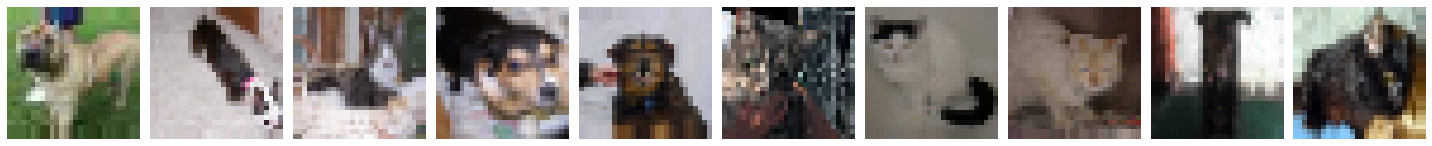

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [22]:
plotImages(imgs)
print(labels)

From above image display and label, we can see that [0,1] is for dog and [1,0] is for cat.

In [23]:
#Let compile our model using categorical_crossentropy loss parameter
# HERE WE ARE USING ADAM OPTIMIZER
clf.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

LET FIT AND TRAIN OUR CLASSIFIER

In [24]:
batch_size = 32
steps_per_epoch=len(X_train)
validation_steps=len(y_val)
print(steps_per_epoch)
print(validation_steps)

train_history_1 = clf.fit_generator(
    train_datagen.flow(X_train,y_train, batch_size=batch_size),
    steps_per_epoch = steps_per_epoch,
    epochs = 4,
    verbose = 2,
    validation_data = (X_val,y_val),
    validation_steps = validation_steps)

12808
3202
Epoch 1/4
 - 419s - loss: 0.5962 - accuracy: 0.6743 - val_loss: 44.8451 - val_accuracy: 0.5984
Epoch 2/4
 - 414s - loss: 0.5402 - accuracy: 0.7245 - val_loss: 26.0078 - val_accuracy: 0.6527
Epoch 3/4
 - 422s - loss: 0.5107 - accuracy: 0.7451 - val_loss: 37.1010 - val_accuracy: 0.6480
Epoch 4/4
 - 432s - loss: 0.4886 - accuracy: 0.7620 - val_loss: 38.6930 - val_accuracy: 0.6424


In [25]:
#Let score(evaluate) our model using accuracy as metrics which we compile above. tHE SCORE BELOW ALIGNS WITH THE VAL_ACCURACY OF 
#OUR TRAINING ABOVE. You can improve your accuracy score in any hyper parameter tunning of your choice.
score = clf.evaluate(X_val, y_val, verbose=1)
print(score)
#let print our score ADAM OPTIMIZER
print('TEST SCORE FOR ADAM Optimizer:',score[0])
print('TEST ACCURACY FOR ADAM Optimizer:',score[1])
print('Score is',score)

3202/3202 [==============================] - 1s 234us/step
[38.69299284001576, 0.6424109935760498]
TEST SCORE FOR ADAM Optimizer: 38.69299284001576
TEST ACCURACY FOR ADAM Optimizer: 0.6424109935760498
Score is [38.69299284001576, 0.6424109935760498]


LET PICKLE OUR MODEL. This will automatically save the trained model and we can use it to make predictions without have to train the model all the time. This will also save us training time, computation problem, memory consumption even though we are using colab and aslo save energy consumption. The python pickle module can help us do this or you use the save_weight() function.

In [26]:
clf.save_weights('Adam_model.h5')

In [27]:
with open('Adam_model.pickle','wb') as f:
    pickle.dump(clf, f)

In [28]:
pickle_in = open('Adam_model.pickle','rb')
clf = pickle.load(pickle_in)

MAKING PREDICTION

In [29]:
#LET VISUALIZE A BATCH OF OUR TEST SIZE
test_imgs, test_labels = next(test_set)

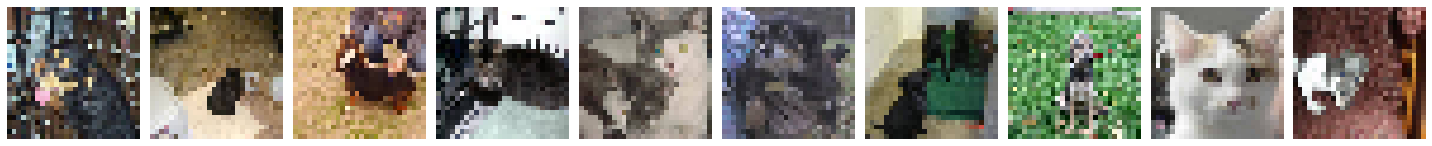

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [30]:
#LET VISUALIZE TEST IMAGE BEFORE MAKING PREDICTION. 
#LET CALL OUR PLOT FUNCTION
plotImages(test_imgs)
print(test_labels)

From above, the first image is a dog. Let see if our model got it correctly. Our model got the first prediction from below [0,1]

In [32]:
#Making new predictions from our trained model :
predictions = clf.predict(x=test_set, verbose=0)
print(np.round(predictions))

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


LET TRY OUR predict_classes() function by loading an image from directory to see the prediction. Our display() function shows is dog. Now from prediction result we will know if our model got it correct.


In [34]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/gdrive/My Drive/Kaggle/test_set/test_set/dogs/dog.4042.jpg', target_size = (28, 28))
display(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
#print(test_image[0][0][0])
result=clf.predict_classes(test_image)
training_set.class_indices

if result[0] == 1:
    prediction='cat'
else:
    prediction='dog'
print(prediction)

dog


From above, our model got is correct

LET DO  VISUALIZATION OF TRAINING HISTORY

In [38]:
# list all data in history
print(train_history_1.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


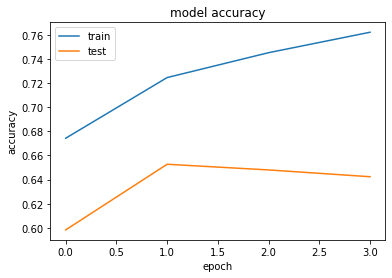

In [39]:
# summarize history for accuracy
plt.plot(train_history_1.history['accuracy'])
plt.plot(train_history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

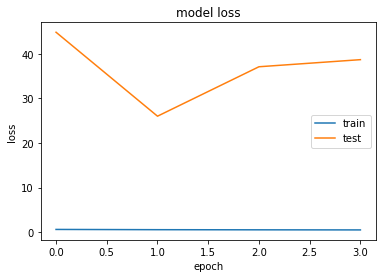

In [41]:

# summarize history for loss
plt.plot(train_history_1.history['loss'])
plt.plot(train_history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='middle left')
plt.show()

LET COMPILE OUR MODEL USING RMSprop OPTIMIZER AND CHECK THE ACCURACY

In [42]:
#Let compile our model using categorical_crossentropy loss parametre and RMSprop OPTIMIZER
clf.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

 LET FIT  AND TRAIN OUR MODEL

In [43]:
batch_size = 32
steps_per_epoch=len(X_train)
validation_steps=len(y_val)
print(steps_per_epoch)
print(validation_steps)

history=clf.fit_generator(
    train_datagen.flow(X_train,y_train, batch_size=batch_size),
    steps_per_epoch = steps_per_epoch,
    epochs = 4,
    verbose = 2,
    validation_data = (X_val,y_val),
    validation_steps = validation_steps)

12808
3202
Epoch 1/4
 - 434s - loss: 0.5487 - accuracy: 0.7340 - val_loss: 181.4775 - val_accuracy: 0.5718
Epoch 2/4
 - 413s - loss: 0.6009 - accuracy: 0.7004 - val_loss: 511.5584 - val_accuracy: 0.6124
Epoch 3/4
 - 419s - loss: 0.6258 - accuracy: 0.6828 - val_loss: 1942.1153 - val_accuracy: 0.5762
Epoch 4/4
 - 408s - loss: 0.6372 - accuracy: 0.6764 - val_loss: 28893.0606 - val_accuracy: 0.5237


In [45]:
#Let score(evaluate) our model using accuracy as metrics which we compile above
score = clf.evaluate(X_val, y_val, verbose = 1)

3202/3202 [==============================] - 1s 241us/step


In [46]:
#let print our score RMSprop OPTIMIZER
print('TEST SCORE FOR RMSprop Optimizer:',score[0])
print('TEST ACCURACY FOR RMSprop Optimizer:',score[1])
print('Score is',score)

TEST SCORE FOR RMSprop Optimizer: 28893.06058713304
TEST ACCURACY FOR RMSprop Optimizer: 0.5237351655960083
Score is [28893.06058713304, 0.5237351655960083]


LET SAVE OUR TRAINED MODEL WHERE WE USE RMSprop OPTIMIZER

In [47]:
clf.save_weights('model_RMSprop.h5')

In [48]:
with open('clf_weight_for_RMSprop.pickle','wb') as f:
    pickle.dump(clf, f)

In [49]:
pickle_in = open('clf_weight_for_RMSprop.pickle','rb')
clf = pickle.load(pickle_in)

In [50]:
!ls #This shows all the files in our working directory

Adam_model.h5		       clf_weight.pickle  test_set
Adam_model.pickle	       kaggle.json	  training_set
cat-and-dog.zip		       model.h5
clf_weight_for_RMSprop.pickle  model_RMSprop.h5


In [51]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


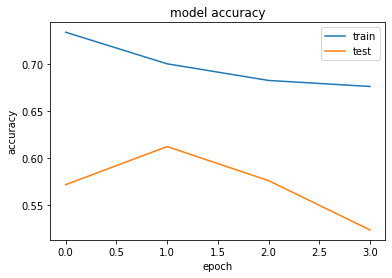

In [54]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='middle left')
plt.show()

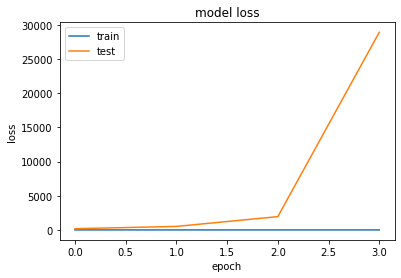

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

IF YOU HAVE REACH HERE, WELL DONE. I KNOW A LOT CAN STILL BE DONE TO IMPROVE THIS MODEL. ORIGINALLY THIS IS A BINARY CLASSIFICATION PROBLEM BUT WE WERE TOLD TO USE 10 OUTPUT NEURON. EVEN THOUGH WE USED SOFTMAX ACTIVATION FUNCTION, THAT WAS JUST BASICALLY TO HELP US USE THAT 10 OUTPUT NEURON AS IT SEEMS TO OVER LITTLE OR KNOW EFFECT IN OUR MODEL PERFORMANCE. BUT USING BINARY CROSS ENTROPY WITH OUTPUT NEURON OF I OR CATEGORICAL-CROSSENTROPY WITH OUTPUT NEURON OF 2 CAN IMPROVE THIS MODEL. ALSO, WE CAN DO SOME HYPERPARAMETRE TUNNINGS AS WELL. FEEL FREE TO LEAVE A COMMENTS. 

DISCLAIMER: THIS IS JUST A PRACTICE.